# Project: Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset consists if 7 tables (Country,League,Match,Player, Player_Attributes,Team,Team_Attributes) which have information about 11 leagues in 11 countries, information about teams and their attributes at 6 yeatrs (2010-2015), informations about players and their attributes at 10 years (2007-2016), information about matches at 8 seasons (2008-2016) .
>
> In this case study i try to cover some informations and questions like who is the best player at each year, matches history for a team or rivalry history between two teams and the most used tactics and play styles .

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
help(sqlite3)


Help on package sqlite3:

NAME
    sqlite3

MODULE REFERENCE
    https://docs.python.org/3.9/library/sqlite3
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    The sqlite3 extension module provides a DB-API 2.0 (PEP 249) compilant
    interface to the SQLite library, and requires SQLite 3.7.15 or newer.
    
    To use the module, start by creating a database Connection object:
    
        import sqlite3
        cx = sqlite3.connect("test.db")  # test.db will be created or opened
    
    The special path name ":memory:" can be provided to connect to a transient
    in-memory database:
    
        cx = sqlite3.connect(":memory:")  # connect to a database in RAM
    
    Once a connection has been e

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the reporti read the data tables, assess and clean if needed.


In [34]:
#read and join country and league tables
con = sqlite3.connect('database.sqlite')
LeagueDF = pd.read_sql_query("""SELECT League.id , League.name , Country.name as 'country'
                                FROM League
                                INNER JOIN Country ON League.country_id=Country.id;""", con)
LeagueDF


,id,name,country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [35]:
#read match table
MatchDF = pd.read_sql_query("SELECT *FROM Match;", con).iloc[:,:11]
MatchDF.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [36]:
#read Player table
PlayerDF = pd.read_sql_query("SELECT *FROM Player;", con)
PlayerDF.head()


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [37]:
#read only the coulmns i need from Player_Attributes table

PlayerAttributesDF = pd.read_sql_query("SELECT *FROM Player_Attributes;", con).iloc[:,:5]
PlayerAttributesDF.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating
0,1,218353,505942,2016-02-18 00:00:00,67.0
1,2,218353,505942,2015-11-19 00:00:00,67.0
2,3,218353,505942,2015-09-21 00:00:00,62.0
3,4,218353,505942,2015-03-20 00:00:00,61.0
4,5,218353,505942,2007-02-22 00:00:00,61.0


In [38]:
#read Team table
TeamDF = pd.read_sql_query("SELECT *FROM Team;", con)
TeamDF.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [39]:
#read Team_Attributes table
TeamAttributesDF = pd.read_sql_query("SELECT *FROM Team_Attributes;", con)
TeamAttributesDF.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [40]:
#explore if there is null values or duplicates in Match dataframe
#correct the format of the date and extract the year to see it.s minimum and maximum
print(MatchDF.isnull().sum())
print("Duplicates:        ",MatchDF.duplicated().sum())
MatchDF['date'] = pd.to_datetime(MatchDF['date'])
MatchDF['year'] = MatchDF['date'].dt.year
MatchDF.describe()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64
Duplicates:         0


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,2011.998653
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,2.354741
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,2008.000000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,2010.000000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,2012.000000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,2014.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2016.000000


In [41]:
#explore if there is null values or duplicates in Player dataframe
print(PlayerDF.isnull().sum())
print("Duplicates:        ",PlayerDF.duplicated().sum())
PlayerDF.describe()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64
Duplicates:         0


,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [42]:
#explore if there is null values or duplicates in PlayerAttributes dataframe
#correct the format of the date and extract the year to see it.s minimum and maximum
#fill the nulls with zeros
print(PlayerAttributesDF.isnull().sum())
PlayerAttributesDF.fillna(0,inplace = True)
print("Duplicates:        ",PlayerAttributesDF.duplicated().sum())
PlayerAttributesDF['date'] = pd.to_datetime(PlayerAttributesDF['date'])
PlayerAttributesDF['year'] = PlayerAttributesDF['date'].dt.year
PlayerAttributesDF.describe()

id                      0
player_fifa_api_id      0
player_api_id           0
date                    0
overall_rating        836
dtype: int64
Duplicates:         0


,id,player_fifa_api_id,player_api_id,overall_rating,year
count,183978.00000,183978.000000,183978.000000,183978.000000,183978.000000
mean,91989.50000,165671.524291,135900.617324,68.288295,2012.499527
std,53110.01825,53851.094769,136927.840510,8.404719,2.626114
min,1.00000,2.000000,2625.000000,0.000000,2007.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,2011.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,2013.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,2014.000000
max,183978.00000,234141.000000,750584.000000,94.000000,2016.000000


In [43]:
#explore if there is null values or duplicates in Team dataframe
#don't need to drop the nulls because i don't need team_fifa_api_id in my analysis
print(TeamDF.isnull().sum())
print("Duplicates:        ",TeamDF.duplicated().sum())
TeamDF.describe()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64
Duplicates:         0


,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


In [44]:
#explore if there is null values or duplicates in TeamAttributesDF dataframe
#correct the format of the date and extract the year to see it.s minimum and maximum
#don't need to drop the nulls because i don't need buildUpPlayDribbling in my analysis
print(TeamAttributesDF.isnull().sum())
print("Duplicates:        ",TeamAttributesDF.duplicated().sum())
TeamAttributesDF['date'] = pd.to_datetime(TeamAttributesDF['date'])
TeamAttributesDF['year'] = TeamAttributesDF['date'].dt.year
TeamAttributesDF.describe()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64
Duplicates:         0


,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,year
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871,2012.506859
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712,1.709201
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,2010.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000,2011.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000,2013.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000,2014.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis



### Best Players at each year

In [45]:
#get the ids of the best players at each year based on overall_ rating
BestPlayersDF = PlayerAttributesDF.iloc[PlayerAttributesDF.groupby('year')["overall_rating"].idxmax()]
#make a table contains the year and the name of the best player at that year
PlayerDFTemp = PlayerDF.drop(['id','player_fifa_api_id'],axis=1)
BestPlayersDF = BestPlayersDF.join(PlayerDFTemp.set_index('player_api_id'), on='player_api_id')
BestPlayersDF[['year','player_name']].style.hide(axis='index')


year,player_name
2007,Gianluigi Buffon
2008,Cristiano Ronaldo
2009,Iker Casillas
2010,Iker Casillas
2011,Lionel Messi
2012,Lionel Messi
2013,Lionel Messi
2014,Lionel Messi
2015,Lionel Messi
2016,Manuel Neuer


### helper Function

In [46]:
def getWinLoseDraw(firstSTAT,secondSTAT):
    """
    gets the total wins, loses and draws of a team based on two tables -firstSTAT, secondStat-,
    the first have informations about the wins, loses and draws when the team is home,
    the second have informations about the wins, loses and draws when the team is away.
    
    Note: we can use the same logic to get the rivalry history between two teams so we can get
          the first team wins and the second teams wins and the draws 
    """
    wins = loses = draws = 0
    try:
        wins+=firstSTAT[(True,False)]
    except:
        pass
    try:
        wins+=secondSTAT[(False,True)]
    except:
        pass

    try:
        loses+=firstSTAT[(False,True)]
    except:
        pass
    try:
        loses+=secondSTAT[(True,False)]
    except:
        pass

    try:
        draws+=firstSTAT[(False,False)]
    except:
        pass
    try:
        draws+=secondSTAT[(False,False)]
    except:
        pass
    return wins, loses , draws


In [47]:
#insert two boolean columns (home_team_win, away_team_goal), and if the value of two columns at a match is false it means draw
MatchDF['home_team_win'] = MatchDF['home_team_goal'] > MatchDF['away_team_goal'] 
#print(MatchDF['home_team_win'])
MatchDF['away_team_win'] = MatchDF['home_team_goal'] < MatchDF['away_team_goal'] 
#print(MatchDF['away_team_win'])

### Matches History 
#### How many wins, loses and draws did a sepcific team get at 8 seasons from 2008 t0 2016?
>make sure to enter the team name correctly you can get the teams names from here https://docs.google.com/spreadsheets/d/1gbfbQxiIvamwT2jhfKzlyPxVZK_P0CYoo0JFU69LrVA/edit?usp=sharing

>ex: Real Madrid cf


Enter the team name: Real Madrid cf
Wins:  228
Loses:  40
Draws:  36


([<matplotlib.patches.Wedge at 0x1dca1649d60>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Wins'),
  Text(0.44186498201010455, -1.0073506527883973, 'Loses'),
  Text(1.024750212126957, -0.39985872848514487, 'Draws')],
 [Text(-0.42426406871192845, 0.4242640687119285, '75.0%'),
  Text(0.24101726291460246, -0.5494639924300349, '13.2%'),
  Text(0.5589546611601582, -0.21810476099189718, '11.8%')])

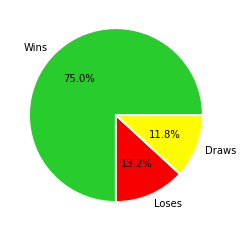

In [48]:
teamName = input('Enter the team name: ')
#gets the team id then get two tables express the match history when the team is home and away
try:
    teamID = int(TeamDF[TeamDF['team_long_name'].str.lower() == teamName.lower() ]['team_api_id'])
    firstSTAT = MatchDF[(MatchDF['home_team_api_id']==teamID)].groupby(['home_team_win','away_team_win'])['id'].count()
    secondSTAT = MatchDF[(MatchDF['away_team_api_id']==teamID)].groupby(['home_team_win','away_team_win'])['id'].count()
except:
    print('please make sure to enter the team name correctly!!!')
    raise
    
#print(firstSTAT)
#print(secondSTAT)

wins, loses, draws = getWinLoseDraw(firstSTAT,secondSTAT)

print("Wins: ",wins)
print("Loses: ",loses)
print("Draws: ",draws)
#draw pie chart
plt.pie([wins,loses,draws],
        labels = ['Wins','Loses','Draws'],
        colors = ['#28CC2D','#f80000','#fffb05'],
        autopct='%1.1f%%',
        wedgeprops={"edgecolor":"white",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True}
       )

### Rivalry History Between Two Teams 
#### How many wins and draws between two teams at 8 seasons from 2008 t0 2016?
>make sure to know that the two teams at the same league
make sure to enter the team name correctly you can get the teams names from here https://docs.google.com/spreadsheets/d/1gbfbQxiIvamwT2jhfKzlyPxVZK_P0CYoo0JFU69LrVA/edit?usp=sharing

>ex: Liverpool, Manchester City

Enter first team name: Liverpool
Enter first team name: Manchester City
Liverpool  wins:  6
Manchester City  wins:  4
Draws 6


([<matplotlib.patches.Wedge at 0x1dca16556d0>,
 [Text(0.42095177560159885, 1.0162674857624154, 'Liverpool Wins'),
  Text(-1.1, 1.3471114790620887e-16, 'Manchester City Wins'),
  Text(0.420951775601599, -1.0162674857624154, 'Draws')],
 [Text(0.22961005941905388, 0.5543277195067721, '37.5%'),
  Text(-0.6, 7.347880794884119e-17, '25.0%'),
  Text(0.229610059419054, -0.554327719506772, '37.5%')])

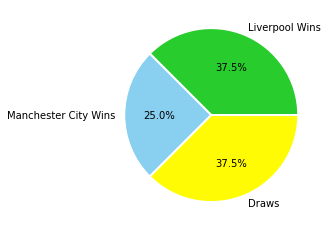

In [50]:
firstTeam = input("Enter first team name: ")
secondTeam = input("Enter first team name: ")
#gets the teams ids then get two tables express the match history when the first team is the home team 
#and when the second team is the home team
try:
    firstTeamID = int(TeamDF[TeamDF['team_long_name'].str.lower() == firstTeam.lower() ]['team_api_id'])
    secondTeamID = int(TeamDF[TeamDF['team_long_name'].str.lower() == secondTeam.lower() ]['team_api_id'])
    firstSTAT = MatchDF[(MatchDF['home_team_api_id']==firstTeamID) & (MatchDF['away_team_api_id']==secondTeamID)].groupby(['home_team_win','away_team_win'])['id'].count()
    secondSTAT = MatchDF[(MatchDF['home_team_api_id']==secondTeamID) & (MatchDF['away_team_api_id']==firstTeamID)].groupby(['home_team_win','away_team_win'])['id'].count()
except:
    print('please make sure to enter the teams names correctly!!!')
    raise
#print(firstSTAT)
#print(secondSTAT)
firstWins, secondWins, draws = getWinLoseDraw(firstSTAT,secondSTAT)
print(firstTeam," wins: ",firstWins)
print(secondTeam," wins: ",secondWins)
print("Draws",draws)
plt.pie([firstWins,secondWins,draws],
        labels = [firstTeam +' Wins',secondTeam+ ' Wins','Draws'],
        colors = ['#28CC2D','#89cff0','#fffb05'],
        autopct='%1.1f%%',
        wedgeprops={"edgecolor":"white",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True}
       )

### The Most Used Tactics
> i used bar chart in each tatic class to show the most used tactics of all teams from 2010 to 2015

<AxesSubplot:title={'center':'defence Defender Line Class'}>

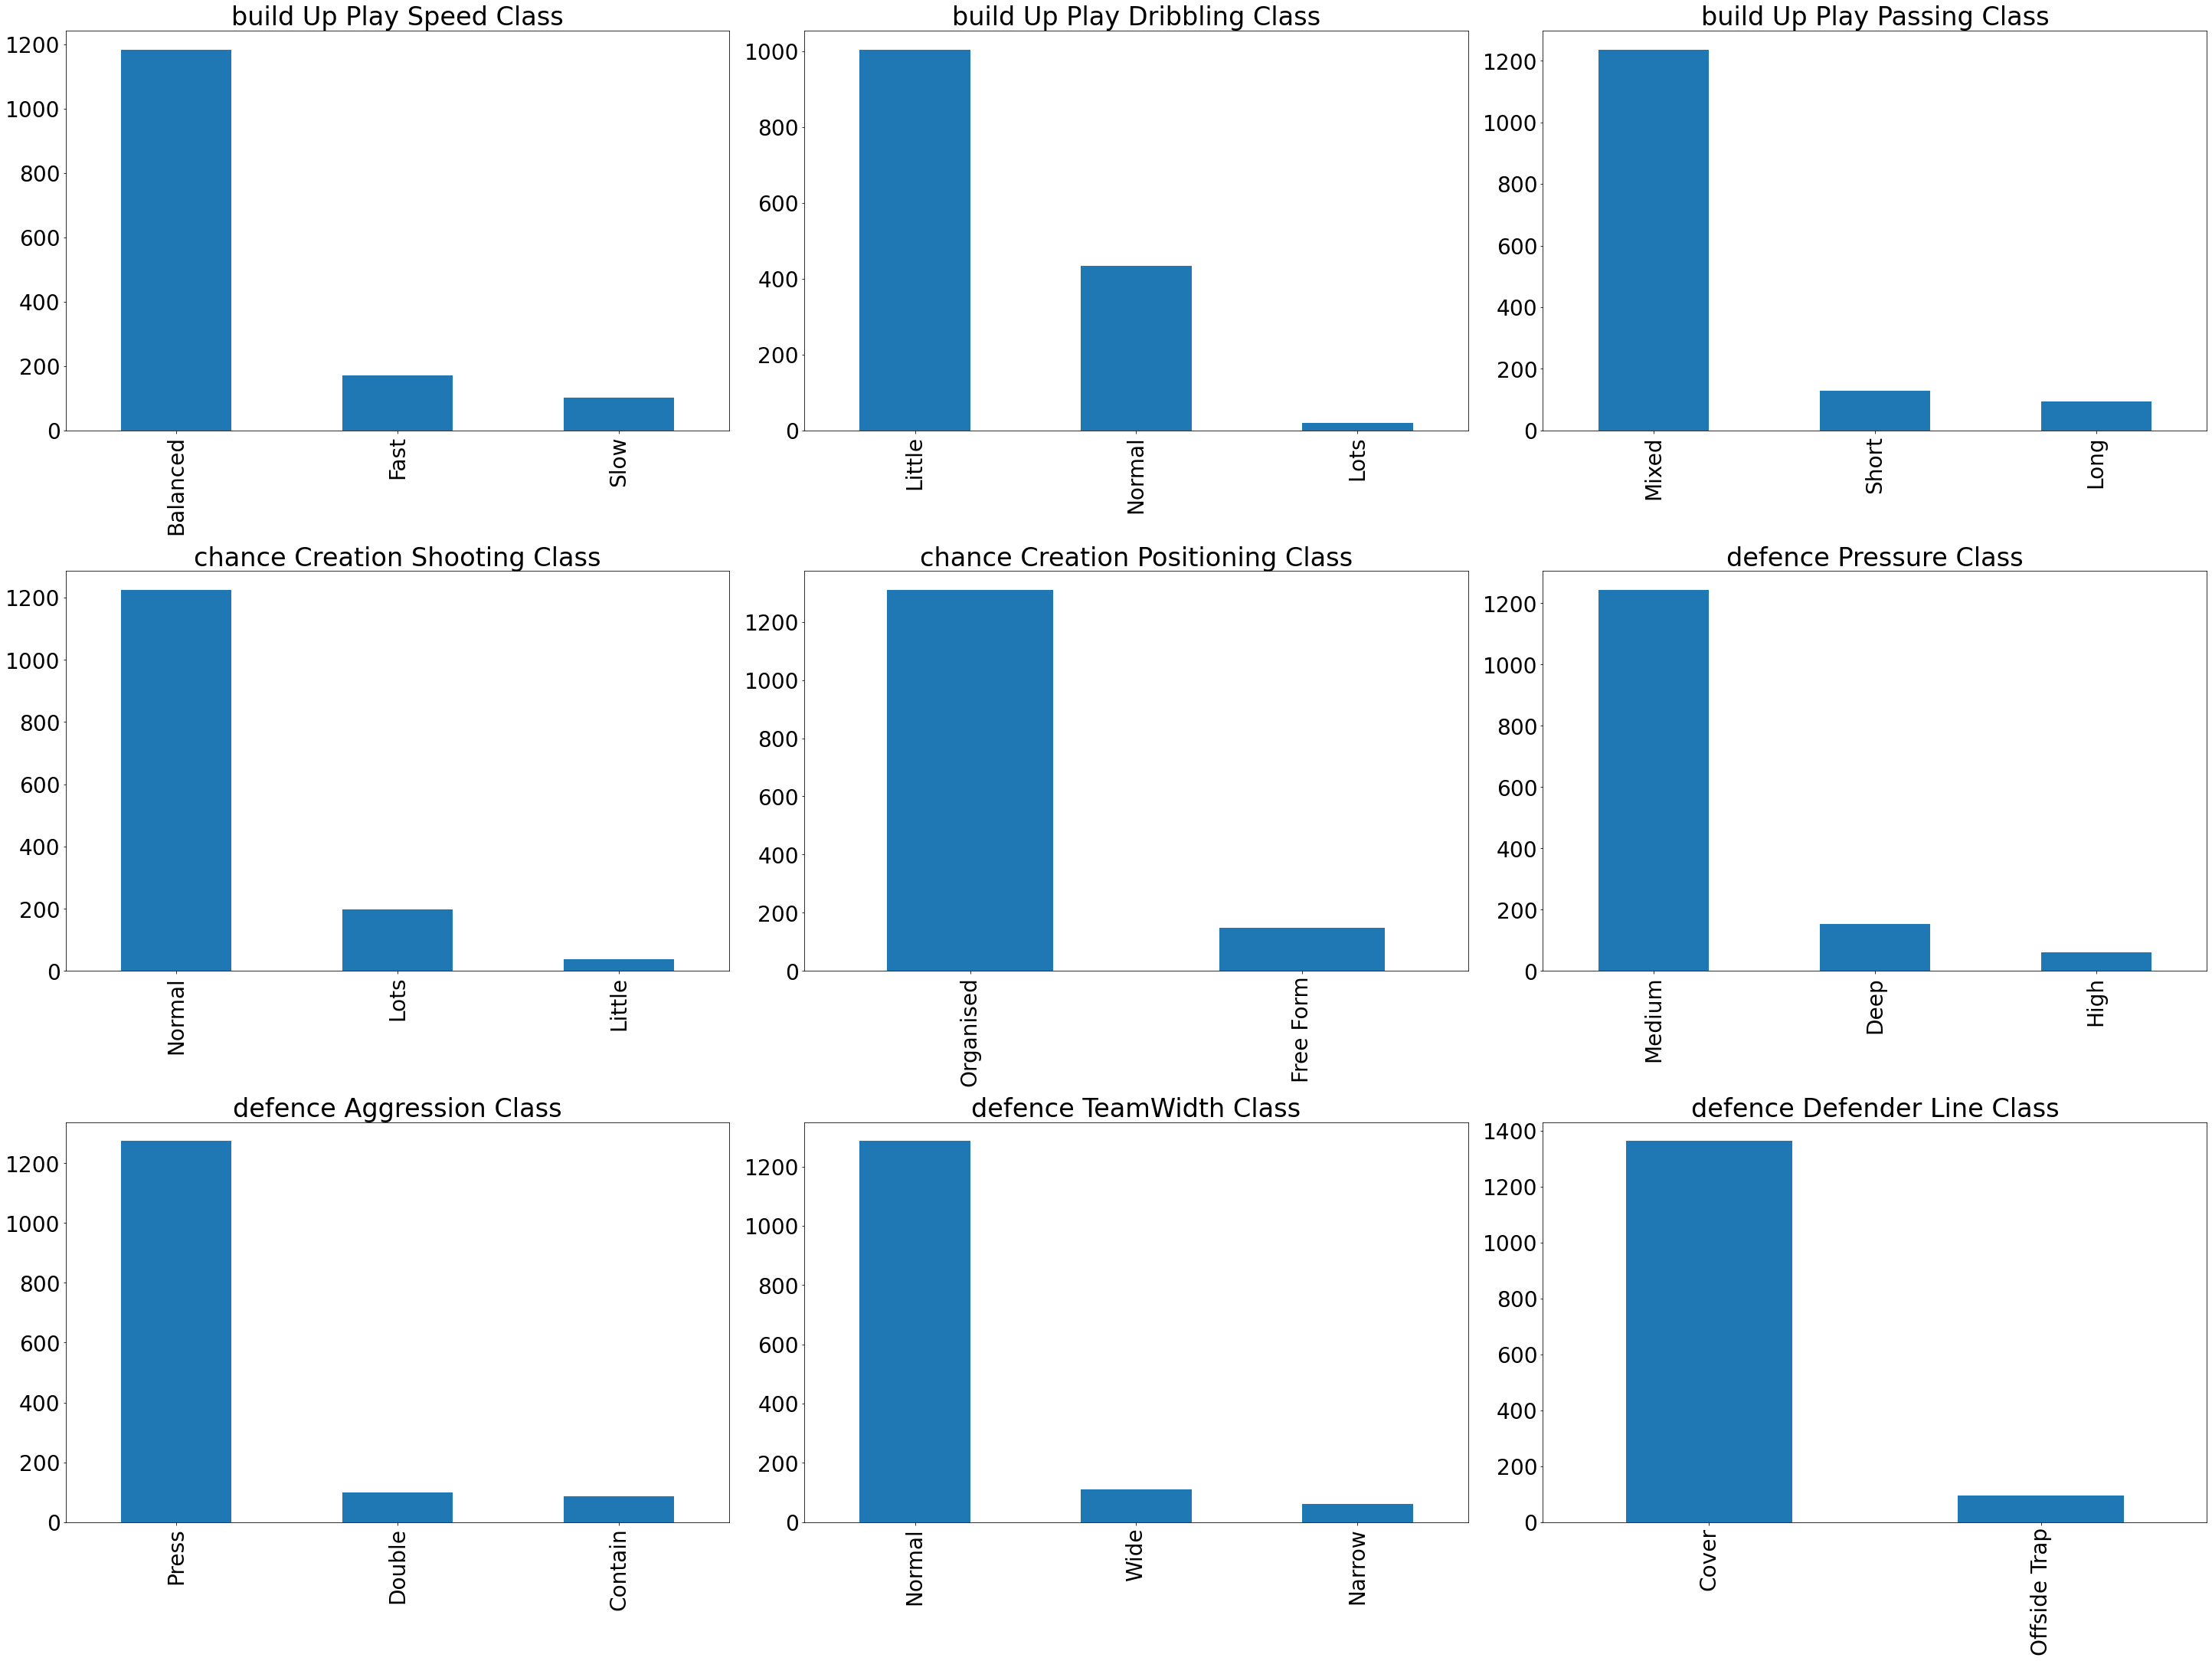

In [51]:
plt.rcParams.update({'font.size': 28})
fig, axes = plt.subplots(3, 3, figsize=(40,30),constrained_layout = True)
axe=axes.flatten()
TeamAttributesDF['buildUpPlaySpeedClass'].value_counts().plot(kind='bar', ax = axe[0],title='build Up Play Speed Class')
TeamAttributesDF['buildUpPlayDribblingClass'].value_counts().plot(kind='bar',ax = axe[1],title='build Up Play Dribbling Class')
TeamAttributesDF['buildUpPlayPassingClass'].value_counts().plot(kind='bar',ax = axe[2],title='build Up Play Passing Class')
TeamAttributesDF['chanceCreationShootingClass'].value_counts().plot(kind='bar',ax = axe[3],title='chance Creation Shooting Class')
TeamAttributesDF['chanceCreationPositioningClass'].value_counts().plot(kind='bar',ax = axe[4],title='chance Creation Positioning Class')
TeamAttributesDF['defencePressureClass'].value_counts().plot(kind='bar',ax = axe[5],title='defence Pressure Class')
TeamAttributesDF['defenceAggressionClass'].value_counts().plot(kind='bar',ax = axe[6],title='defence Aggression Class')
TeamAttributesDF['defenceTeamWidthClass'].value_counts().plot(kind='bar',ax = axe[7],title='defence TeamWidth Class')
TeamAttributesDF['defenceDefenderLineClass'].value_counts().plot(kind='bar',ax = axe[8],title='defence Defender Line Class')

<a id='conclusions'></a>
## Conclusions
>this report shows best players at each years from 2007 to 2016,
shows the match history of any team you choose from 2008 to 2016,
shows the rivalry history between any two teams you choose ats the same league from 2008 to 2016,
and shows the most commonly used tactics of all teams from 2010 to 2015.

>there aare additional information we can get from this dataset like the most players score goals or have cards at each year at each league and the leagues winners ate each year 